In [18]:
from sklearn.datasets import fetch_openml


#Загружаем датасет и определяем его размеры
data = fetch_openml(name='led-display-domain-7digit', version=1)

print(data.data.shape)
print(data.target.shape)

(500, 7)
(500,)


In [19]:
data.data.head()

,V1,V2,V3,V4,V5,V6,V7
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
data.data.describe()
#Описание данных

,V1,V2,V3,V4,V5,V6,V7
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.726000,0.590000,0.734000,0.662000,0.396000,0.818000,0.670000
std,0.446456,0.492326,0.442307,0.473502,0.489554,0.386231,0.470684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Датасет LED-display-domain-7digit содержит 7 булевых атрибутов и 10 классов, которые представляют собой десятичные цифры. Каждый класс соответствует одной из цифр от 0 до 9, которые могут быть отображены на светодиодном дисплее. Все значения атрибутов являются либо 0, либо 1. Датасет содержит 5000 экземпляров.
Задача, которую можно решить с помощью моделирования на этом датасете, заключается в классификации цифр на светодиодном дисплее. Точность классификации может быть измерена с помощью метрики accuracy, которая показывает, какая доля экземпляров была классифицирована правильно. В датасете LED-display-domain-7digit точность классификации составляет 74%, что означает, что около 26% экземпляров были классифицированы неправильно.

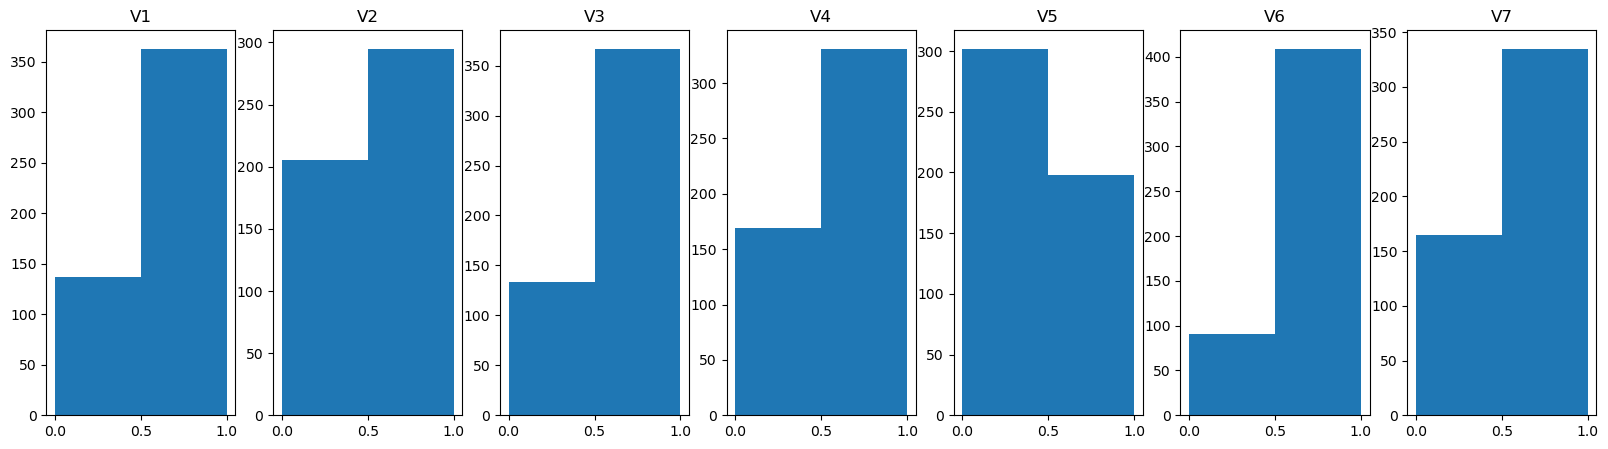

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

fig, axs = plt.subplots(nrows=1, ncols=len(data.feature_names), figsize=(20,5))
for i, feature in enumerate(data.feature_names):
    axs[i].hist(data.data[feature], bins=2)
    axs[i].set_title(feature)
plt.show()

Для обучения можно использовать логистическую регрессию. 

In [22]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

model = LogisticRegression()
model.fit(data.data, data.target)

y_pred = model.predict(data.data)

# вычисляем среднюю абсолютную ошибку
mae = mean_absolute_error(data.target, y_pred)
print('MAE:', mae)


accuracy = model.score(data.data, data.target) # оценка точности модели
print('Accuracy:', accuracy)

MAE: 0.984
Accuracy: 0.772


Точность равна 77%, среднеабсолютная ошибка не велика, на практике можно применять, но с проверками

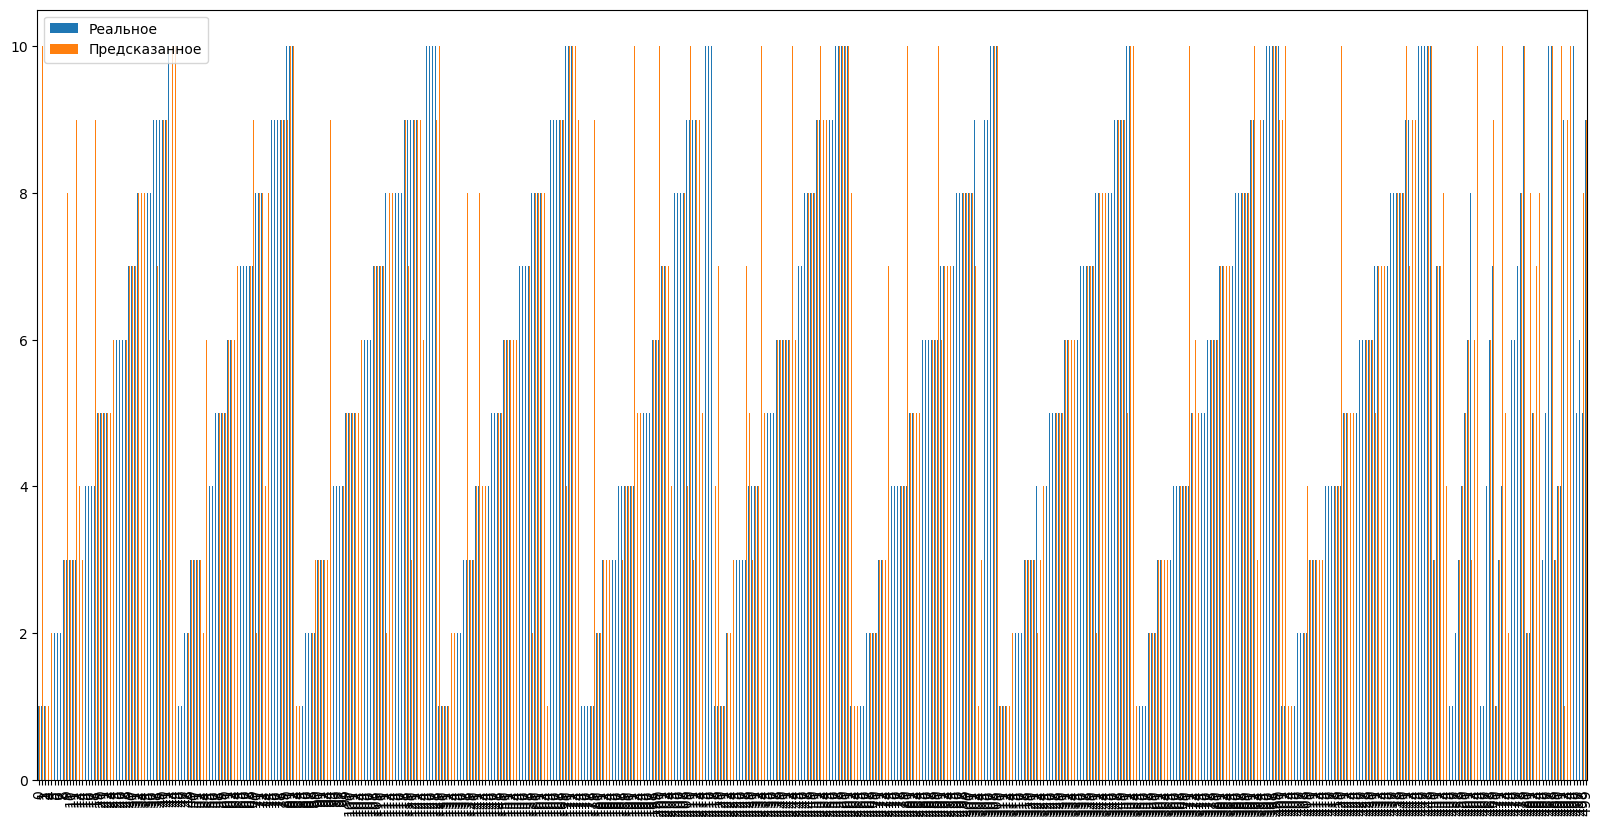

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

y_pred = model.predict(data.data)

df = pd.DataFrame({'Реальное': data.target, 'Предсказанное': y_pred})
df = df.astype(int)
df.plot(kind='bar', figsize=(20, 10))
plt.show()

Для сравнения использованы модели логистической регрессии, решающего дерева, случайного леса и градиентного бустинга.

In [27]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42) # разделение на обучающую и тестовую выборки

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

for model in models:
    model.fit(X_train, y_train)


# оценка эффективности моделей на тестовой выборке
for model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_pred = model.predict(data.data)
    mae = mean_absolute_error(data.target, y_pred)
    print(type(model).__name__, 'accuracy:', acc, 'MAE:', mae)

LogisticRegression accuracy: 0.73 MAE: 0.996
DecisionTreeClassifier accuracy: 0.68 MAE: 0.996
RandomForestClassifier accuracy: 0.7 MAE: 0.988
GradientBoostingClassifier accuracy: 0.73 MAE: 0.962


Сравнение показало, что наиболее выгодным в данном случае использовать метод градиентного бустинга